## **Week 2 팀미션** 


#### 1. Matplotlib
파이썬의 대표적 시각화 도구 라이브러리인 matplotlib의 기본 사용법에 대해 숙지하고, **matplotlib에서 사용되는 여러 graph들에 대해 조사해 보고, 해당 graph들에 어느 데이터가 실무에서 적합하게 쓰일지 조사해 보자.**



- 사용한 데이터셋 : [Billboard Hits Songs Dataset](https://www.kaggle.com/datasets/dem0nking/billboard-hits-songs-dataset


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter

In [2]:
data = pd.read_csv("Iconic_Songs_Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Artist       100 non-null    object
 2   Genre        100 non-null    object
 3   ReleaseDate  100 non-null    object
 4   Duration     100 non-null    object
 5   Album        98 non-null     object
 6   Popularity   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [4]:
data.head()

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94


In [5]:
# 데이터 중 Title만 보고 싶을 떄 
data['Title']

0       Blinding Lights
1            Levitating
2               Peaches
3       Save Your Tears
4              Good 4 U
            ...        
95    Sunflower - Remix
96             Mi Gente
97            Taki Taki
98         Loco Contigo
99            Con Calma
Name: Title, Length: 100, dtype: object

In [6]:
# 데이터 중 중복값이 있는지
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Artist       100 non-null    object
 2   Genre        100 non-null    object
 3   ReleaseDate  100 non-null    object
 4   Duration     100 non-null    object
 5   Album        98 non-null     object
 6   Popularity   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.2+ KB


In [7]:
# 앨범에 있는 결측치 찾기 
data[data.isna( ).any(axis=1)]

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
40,Stuck with U,Ariana Grande & Justin Bieber,Pop,2024-03-10,3:48,NaN,86
56,Savage Love,Jawsh 685 & Jason Derulo,Pop,2024-05-30,2:51,NaN,92


In [8]:
# 결측치는 None으로 변경
data = data.fillna("None")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Artist       100 non-null    object
 2   Genre        100 non-null    object
 3   ReleaseDate  100 non-null    object
 4   Duration     100 non-null    object
 5   Album        100 non-null    object
 6   Popularity   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.2+ KB


#### 1-1. 100개의 데이터 중 제일 많은 이름을 올린 가수는? 

In [10]:
counter = Counter(data['Artist'].tolist())
top_artist = counter.most_common(10)
print(top_artist)

[('The Weeknd', 4), ('Billie Eilish', 4), ('Ariana Grande', 4), ('Drake', 4), ('Dua Lipa', 3), ('Olivia Rodrigo', 3), ('Lil Nas X', 3), ('BTS', 3), ('Post Malone', 3), ('The Kid LAROI & Justin Bieber', 2)]


In [11]:
X = []
Y = []

for artist, count in top_artist:
    X.append(artist)
    Y.append(count)

print(X,Y)

['The Weeknd', 'Billie Eilish', 'Ariana Grande', 'Drake', 'Dua Lipa', 'Olivia Rodrigo', 'Lil Nas X', 'BTS', 'Post Malone', 'The Kid LAROI & Justin Bieber'] [4, 4, 4, 4, 3, 3, 3, 3, 3, 2]


([<matplotlib.axis.XTick at 0x130fd5f90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

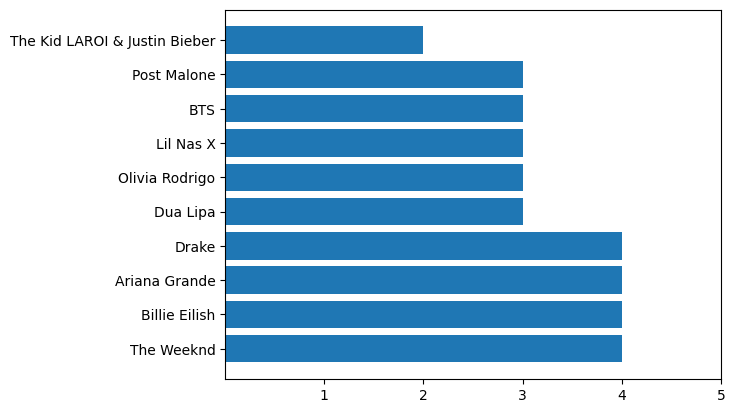

In [12]:
plt.barh(X,Y)
plt.xticks(range(1,6))

#### 1-2. 제일 많은 장르 순으로 시각화

In [13]:
genre_dict = dict() 

for genre in data['Genre']:
    if genre in genre_dict:
        genre_dict[genre] += 1
    else: 
        genre_dict[genre] = 1 

print(genre_dict)

{'Pop': 59, 'K-Pop': 3, 'Afrobeats': 2, 'Country': 1, 'R&B': 3, 'Dance': 1, 'Hip-Hop': 26, 'Electronic': 1, 'Reggaeton': 4}


In [14]:
genre_dict = sorted(genre_dict.items(), key = lambda x : x[1],reverse= True)

In [15]:
genre_dict

[('Pop', 59),
 ('Hip-Hop', 26),
 ('Reggaeton', 4),
 ('K-Pop', 3),
 ('R&B', 3),
 ('Afrobeats', 2),
 ('Country', 1),
 ('Dance', 1),
 ('Electronic', 1)]

([<matplotlib.patches.Wedge at 0x1318bbe90>,
 [Text(-1.0563230795297933, 0.3068901296110612, 'Pop'),
  Text(1.080515935661083, 0.20611965646792366, 'Hip-Hop'),
  Text(0.8018656614812494, -0.7530016340866987, 'Reggaeton'),
  Text(0.6182919270980652, -0.909788487993424, 'K-Pop'),
  Text(0.4368629185950908, -1.009529984872455, 'R&B'),
  Text(0.27355913174990715, -1.0654414115455797, 'Afrobeats'),
  Text(0.17207817474853218, -1.0864571329671566, 'Country'),
  Text(0.10351941149083534, -1.0951181358395046, 'Dance'),
  Text(0.03455210442776199, -1.0994572079347213, 'Electronic')],
 [Text(-0.576176225198069, 0.1673946161514879, '59%'),
  Text(0.5893723285424087, 0.11242890352795834, '26%'),
  Text(0.4373812698988632, -0.4107281640472902, '4%'),
  Text(0.33725014205349013, -0.49624826617823126, '3%'),
  Text(0.23828886468823132, -0.550652719021339, '3%'),
  Text(0.1492140718635857, -0.5811498608430433, '2%'),
  Text(0.09386082259010844, -0.592612981618449, '1%'),
  Text(0.05646513354045563, -0

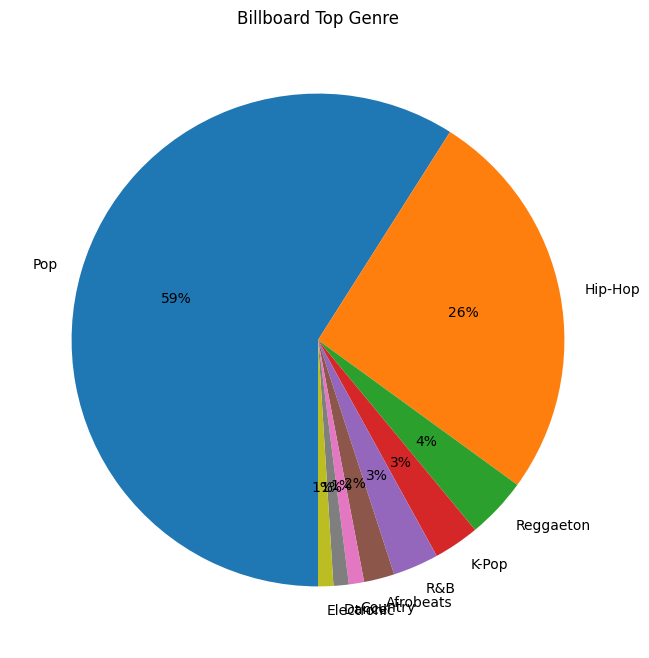

In [16]:
X = []
Y = [] 

for genre , count in genre_dict:
    X.append(genre)
    Y.append(count)


plt.figure(figsize = (10, 8))
plt.title("Billboard Top Genre")
plt.pie(Y,labels=X,autopct="%.f%%",startangle = -90,counterclock = False)


#### 1-3. The Weeknd 의 Popularity 추이 

In [17]:
# 가수의 이름이 The Weeknd 인 행만 추려온다 

joomal = data.loc[data.Artist == "The Weeknd"]
joomal

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
15,Take My Breath,The Weeknd,Pop,2024-08-01,3:40,Dawn FM,94
28,Die For You,The Weeknd,Pop,2024-01-10,3:56,Starboy,90


([<matplotlib.axis.YTick at 0x13192e8d0>,
 [Text(0, 90, '90'),
  Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

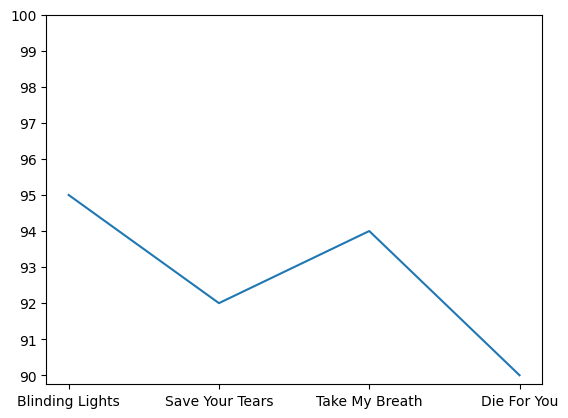

In [18]:
plt.plot(joomal['Title'], joomal['Popularity'])
plt.yticks(range(90,101))

In [19]:
drake = data.loc[data.Artist == "Drake"]
drake

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
44,What's Next,Drake,Hip-Hop,2024-04-01,2:58,Scary Hours 2,88
76,Nice for What,Drake,Hip-Hop,2024-09-10,3:30,Scorpion,94
88,In My Feelings,Drake,Hip-Hop,2024-11-05,3:37,Scorpion,92
93,Nice for What - Remix,Drake,Hip-Hop,2024-12-01,3:31,Scorpion,91


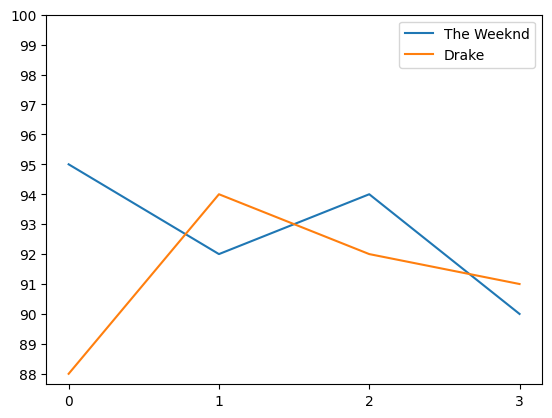

In [20]:
X = len(joomal)
plt.plot(range(X), joomal['Popularity'])
plt.plot(range(X),drake['Popularity'])
plt.yticks(range(88,101))
plt.xticks(range(0,4))
plt.legend(['The Weeknd', "Drake"])

#### 1-4. 아티스트와 인기도의 상관관계 
- 아티스트는 문자열이고 인기도는 숫자임. 
- 아티스트를 숫자로 표시할 방법은 없을까? + 숫자에 의미를 담을 방법 -> count 로 하면 될 것 같은데 feat 랑 & 구별해서 다시 저장해야함

In [21]:
counter = Counter(data['Artist'].tolist())

노래 길이와 인기도의 상관관계 
- 노래가 짧으면 인기도 높다

In [22]:
LEN = len(data)

new_dur = [] 
for i in range(LEN): 
    dur = data['Duration'][i]
    min , sec = dur.split(":")
    min = int(min)
    if int(sec) >= 30 :
        min += 1 

    new_dur.append(min)

new_dur = pd.DataFrame(new_dur)

In [23]:
data = pd.concat([data, new_dur], axis = 1)
data

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity,0
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95,3
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93,3
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91,3
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92,4
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94,3
...,...,...,...,...,...,...,...,...
95,Sunflower - Remix,Post Malone & Swae Lee,Hip-Hop,2024-12-15,2:39,Hollywood's Bleeding,88,3
96,Mi Gente,J Balvin & Willy William,Reggaeton,2024-12-20,3:06,Vibras,93,3
97,Taki Taki,DJ Snake ft. Selena Gomez & Ozuna & Cardi B,Reggaeton,2024-12-25,3:32,Carte Blanche,91,4
98,Loco Contigo,DJ Snake ft. J Balvin & Tyga,Reggaeton,2025-01-01,3:05,Carte Blanche,89,3


In [24]:
data.rename(columns= {'0':'new_dur'},inplace= True)

In [25]:
subdata = data.iloc[: , 6:]

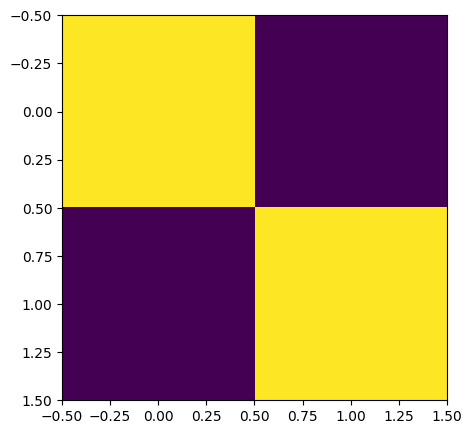

In [26]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()
ax.imshow(subdata.corr(), cmap = 'viridis', interpolation = 'nearest')
#흠..

### 2. 노름
 **벡터의 노름은 데이터를 정제하는 방법 중 정규화(Normalization), 규제(Regularization) 등에서 유용하게 쓰여진다.**
 **벡터의 노름의 구조와 개념에 대해 더 자세히 알아보고 머신러닝 분야에서 어떻게 쓰이는지 자세히 알아보자. 또한, L1 노름과 L2 노름이 머신러닝 분야에서 어떤 차이점을 가지고 사용되는지에 대해 비교 분석해보자.**

 **노름(Norm) 이란?** 
 
![nn](norm.png)
- 벡터의 크기 또는 길이를 측정하는 함수임
- Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리
- 머신러닝에서 과적합 문제를 해결하기 위한 방법으로 쓰임 -> 정규화 
- p 는 노름의 차수를 말한다 p = 1 이면 L1 노름이 되고 p = 2이면 L2 노름이 된다. 

**L1 Norm**

![nn](norm1.png)
- L1 노름은 p의 값이 1인 노름
- 벡터 요소의 절댓값의 합  -> 요소의 값 변화를 정확히 파악 가능
- L1 정규화에 활용됨 

**L2 Norm** 

![nn](norm2.png)
- L2 노름은 p의 값이 2인 노름 
- L2 Norm은 n 차원 좌표평면(유클리드 공간)에서의 벡터의 크기를 계산하기 때문에 유클리드 노름(Euclidean norm)이라고도 한다.
- L2 정규화, KNN 이나 K-mens 알고리즘 같이 거리를 비교해서 클래스를 분류하는 문제에도 사용됨 



[참고]
- https://yhyun225.tistory.com/18
- http://taewan.kim/post/norm/